## Step 1:  Import 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

import sys  
sys.path.insert(0, 'C:/Users/Beth & Andrew/Documents/GitHub/DataScienceGuidedCapstone/Notebooks/library/')
from sb_utils import save_file 


## Step 2:  Load the Data

In [2]:
housing_data = pd.read_csv('C:/Users/Beth & Andrew/Documents/GitHub/Ames Housing/AmesHousing.csv')

## Step 3:  Look at summary of data

In [3]:
housing_data.info

<bound method DataFrame.info of       Order        PID  MS SubClass MS Zoning  Lot Frontage  Lot Area Street  \
0         1  526301100           20        RL         141.0     31770   Pave   
1         2  526350040           20        RH          80.0     11622   Pave   
2         3  526351010           20        RL          81.0     14267   Pave   
3         4  526353030           20        RL          93.0     11160   Pave   
4         5  527105010           60        RL          74.0     13830   Pave   
...     ...        ...          ...       ...           ...       ...    ...   
2925   2926  923275080           80        RL          37.0      7937   Pave   
2926   2927  923276100           20        RL           NaN      8885   Pave   
2927   2928  923400125           85        RL          62.0     10441   Pave   
2928   2929  924100070           20        RL          77.0     10010   Pave   
2929   2930  924151050           60        RL          74.0      9627   Pave   

     Al

we will be interested in the 'SalePrice' column.   the other columns are the features.

## Step 4:  Call head of data 
#### This is to further familiarize ourselves with our data set.

In [4]:
housing_data.head()

,Order,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,1,526301100,20,RL,141.0,31770,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,NaN,0,5,2010,WD,Normal,215000
1,2,526350040,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,...,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,105000
2,3,526351010,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,172000
3,4,526353030,20,RL,93.0,11160,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,244000
4,5,527105010,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,...,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,189900


basically looks good.  the column headers are informative. we can already see there is plenty of missing data.

## Step 5:  Lets look at categorical data.  

In [5]:
housing_data.select_dtypes('object')

,MS Zoning,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,...,Garage Type,Garage Finish,Garage Qual,Garage Cond,Paved Drive,Pool QC,Fence,Misc Feature,Sale Type,Sale Condition
0,RL,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,...,Attchd,Fin,TA,TA,P,NaN,NaN,NaN,WD,Normal
1,RH,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,...,Attchd,Unf,TA,TA,Y,NaN,MnPrv,NaN,WD,Normal
2,RL,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,...,Attchd,Unf,TA,TA,Y,NaN,NaN,Gar2,WD,Normal
3,RL,Pave,NaN,Reg,Lvl,AllPub,Corner,Gtl,NAmes,Norm,...,Attchd,Fin,TA,TA,Y,NaN,NaN,NaN,WD,Normal
4,RL,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,...,Attchd,Fin,TA,TA,Y,NaN,MnPrv,NaN,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2925,RL,Pave,NaN,IR1,Lvl,AllPub,CulDSac,Gtl,Mitchel,Norm,...,Detchd,Unf,TA,TA,Y,NaN,GdPrv,NaN,WD,Normal
2926,RL,Pave,NaN,IR1,Low,AllPub,Inside,Mod,Mitchel,Norm,...,Attchd,Unf,TA,TA,Y,NaN,MnPrv,NaN,WD,Normal
2927,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,...,NaN,NaN,NaN,NaN,Y,NaN,MnPrv,Shed,WD,Normal
2928,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Mod,Mitchel,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal


Quite a few variables have categorical features

## Step 6:  Identify duplicates

In [6]:
###  It is likely that there are duplicated sales price values so we see if there are duplicted parcel ids instead.
housing_data['PID'].value_counts()

526301100    1
535375130    1
535378080    1
535379060    1
535379110    1
            ..
923228150    1
923228230    1
923230200    1
923252075    1
924151050    1
Name: PID, Length: 2930, dtype: int64

Looks like we do not have duplicated data (rows)

## Step 7:  Location, Location, Location.  
#### They say in real estate location is everything, so lets look at our neighborhood data.

In [7]:
# First in location we are looking at the number of sales by neighborhood.
df_nb = housing_data['Neighborhood'].value_counts()
df_nb

NAmes      443
CollgCr    267
OldTown    239
Edwards    194
Somerst    182
NridgHt    166
Gilbert    165
Sawyer     151
NWAmes     131
SawyerW    125
Mitchel    114
BrkSide    108
Crawfor    103
IDOTRR      93
Timber      72
NoRidge     71
StoneBr     51
SWISU       48
ClearCr     44
MeadowV     37
BrDale      30
Blmngtn     28
Veenker     24
NPkVill     23
Blueste     10
Greens       8
GrnHill      2
Landmrk      1
Name: Neighborhood, dtype: int64

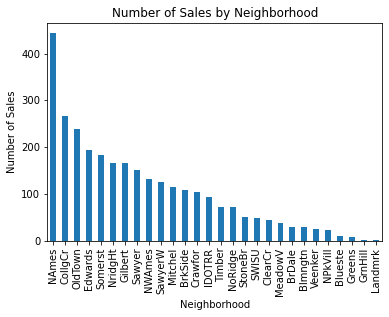

In [8]:
#  Lets graph sales by neighborhood
df_nb.plot(kind = 'bar')
plt.title("Number of Sales by Neighborhood")
plt.xlabel("Neighborhood")
plt.ylabel("Number of Sales")
plt.show()

Here we see a large number of sales NAmes neighborhood.  We also see very few sales in Landmrk and GrnHill neighborhoods.  Wonder if these two are exclusive neighborhoods or are outliers in sales price not just number of sales.


In [9]:
#  Now we will pull in average sales price by neighborhood.

df = housing_data[['Neighborhood', 'SalePrice']].groupby('Neighborhood').agg(['count', 'mean'])

df1 = round(df, 2)

df1.sort_values(by = ('SalePrice', 'mean'), ascending = False)


SalePrice           
                 count       mean
Neighborhood                     
NoRidge             71  330319.13
StoneBr             51  324229.20
NridgHt            166  322018.27
GrnHill              2  280000.00
Veenker             24  248314.58
Timber              72  246599.54
Somerst            182  229707.32
ClearCr             44  208662.09
Crawfor            103  207550.83
CollgCr            267  201803.43
Blmngtn             28  196661.68
Greens               8  193531.25
Gilbert            165  190646.58
NWAmes             131  188406.91
SawyerW            125  184070.18
Mitchel            114  162226.63
NAmes              443  145097.35
Blueste             10  143590.00
NPkVill             23  140710.87
Landmrk              1  137000.00
Sawyer             151  136751.15
SWISU               48  135071.94
Edwards            194  130843.38
BrkSide            108  124756.25
OldTown            239  123991.89
BrDale              30  105608.33
IDOTRR              93  103752.90
MeadowV             37   95756.49

Landmrk neighborhood has only one and Greens neighborhood has only 2 sales but neither seem outliers in terms of price.
Here we can see average sales price in NoRidge neighborhood are more than 3x the avg sales price in MeadowV.  Given this finding it is likely the neighborhood will influence the sales price.  Lets look at this further. 

In [10]:
#  For clarity lets look just at neighborhood and sales price.

df2 = housing_data[['Neighborhood', 'SalePrice']].groupby('Neighborhood').agg('mean')

df3 = round(df2, 2)
df4 = df3.sort_values(by = 'SalePrice', ascending = False)
df4

,SalePrice
Neighborhood,
NoRidge,330319.13
StoneBr,324229.20
NridgHt,322018.27
GrnHill,280000.00
Veenker,248314.58
Timber,246599.54
Somerst,229707.32
ClearCr,208662.09
Crawfor,207550.83


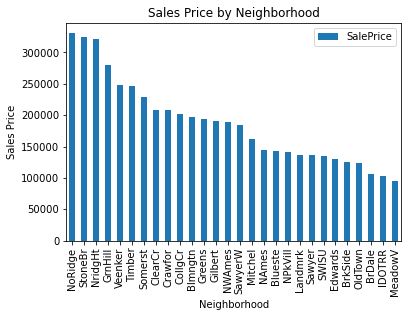

In [11]:
#  Lets have a look at sales price by neighborhood in a bar graph
df4.plot(kind = 'bar')
plt.title("Sales Price by Neighborhood")
plt.xlabel("Neighborhood")
plt.ylabel("Sales Price")
plt.show()

We have visual confirmation of the discrepency in average sales price by neighborhood.

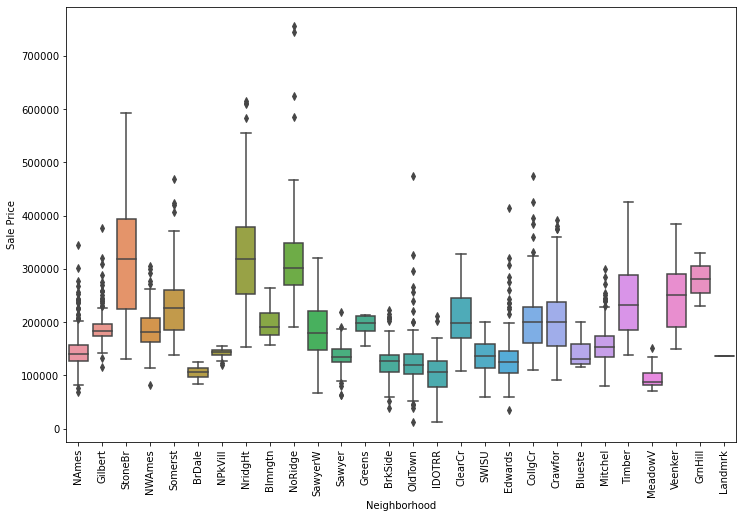

In [12]:
plt.subplots(figsize=(12, 8))
sns.boxplot(x= housing_data['Neighborhood'], y=housing_data['SalePrice'], data=df4)
plt.xticks(rotation='vertical')
plt.ylabel('Sale Price')
plt.xlabel('Neighborhood');

One thing of note here would be the outliers in the NoRidge neighborhood.  This neighborhood had our highest average sales price but looks like the median is in line with other 'high-end' neighbohoods but might have more outliers.  Perhaps larger houses?  Should we look at home size?  What other variables shoud we examine? 

## Step 8:  Review of more variables.

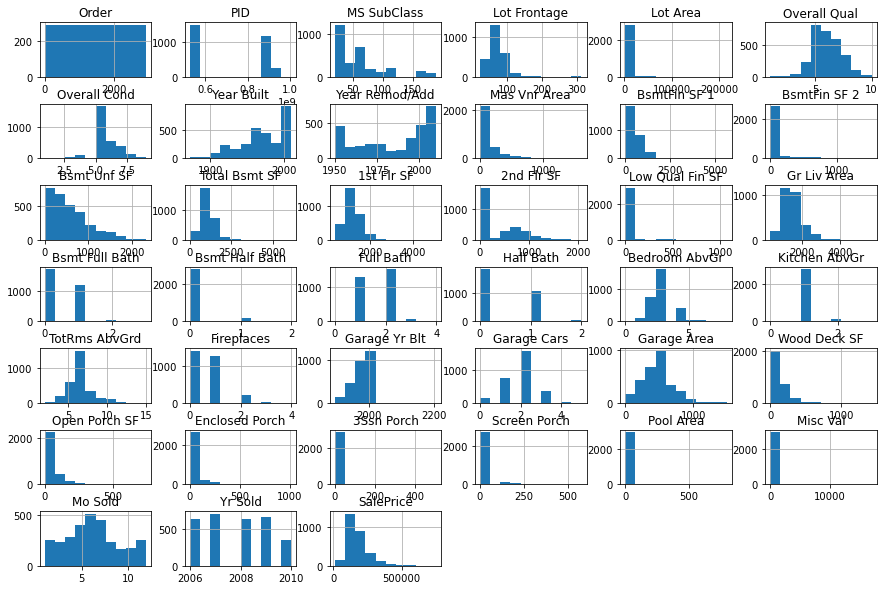

In [13]:
housing_data.hist(figsize = (15,10))
plt.subplots_adjust(hspace=0.5)

A few items of note from this cursary exmination of variables.  1)  There are a few outliers in terms of price and lot frontage but nothing strikes me as being obviously incorrect.
2) There are some major outliers in Lot Area however this is a town in Iowa so there could be properties with large acreage that are still within the town limits.  3)  There are fewer sales in the year 2010.  There were subprime mortgage issues going on nationwide in this time frame so I wonder if fewer sales reflect a soft housing market and therefore lower sales price in this year or perhaps data was just collected partway through the year 2010.

## Step 9:  Further examination of Year Sold vs House price.

In [14]:
#  Just for fun, lets look at sales price by year

df_yr = housing_data[['Yr Sold', 'SalePrice']].groupby('Yr Sold').agg('mean')

df_yr2 = round(df_yr, 2)
df_yr3 = df_yr2.sort_values(by = 'Yr Sold', ascending = False)
df_yr3

,SalePrice
Yr Sold,
2010,172597.60
2009,181404.57
2008,178841.75
2007,185138.21
2006,181761.65


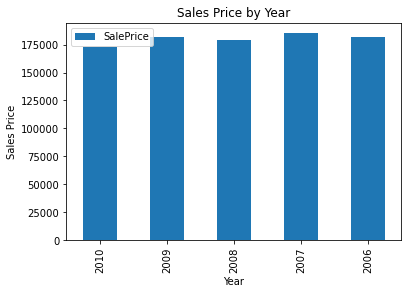

In [15]:
df_yr3.plot(kind = 'bar')
plt.title("Sales Price by Year")
plt.xlabel("Year")
plt.ylabel("Sales Price")
plt.show()

Yeah perhaps we are seeing a soft market in the year 2010 as the average sales price is lower. 172K in 2010 vs 181k in 2009.   We will want to keep year sold in our analysis.  It does not look like such a wild disparity on the graph.


## Step 10:  Does size matter?

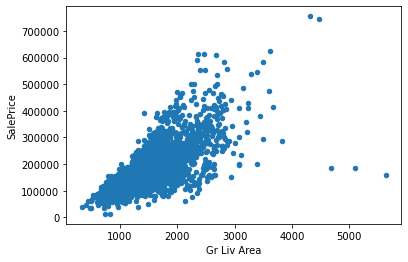

In [16]:
housing_data.plot(x='Gr Liv Area', y='SalePrice', kind='scatter');
plt.show()

A few observations here.  Generally there seems to be a relationship between Above Ground Living Area and Sales Price so this is likely another good explanatory variable.  There do seem to be 3 outliers but it is not unreasonable for these to be explained by other variables (neighborhood, condition, etc)

It looks like we have already identified some variables that we can reasonably assume will help us build a model.  Are there any variables that we can safely remove?


## Step 11:  Get Rid of some data. 

In [17]:
### How much data is missing
missing = pd.concat([housing_data.isna().sum(), 100 * housing_data.isna().mean()], axis=1)
missing.columns=['count', '%']
missing_sort = missing.sort_values(by=['count', '%'], ascending = [False, False])
missing_sort.head(82)


,count,%
Pool QC,2917,99.556314
Misc Feature,2824,96.382253
Alley,2732,93.242321
Fence,2358,80.477816
Fireplace Qu,1422,48.532423
...,...,...
Mo Sold,0,0.000000
Yr Sold,0,0.000000
Sale Type,0,0.000000
Sale Condition,0,0.000000


Pool QC has the most missing values.  However, I suspect the presence of a pool can still give us some clues for value.  Also, there are additional columns with pool data so we may be able to combine.  Therefore I do not want to get rid of pool qc quite yet.
Lets dig deeper into 'Misc Feature', 'Alley' and 'Fence'

### Misc Feature

In [18]:
df_misc = housing_data['Misc Feature'].value_counts()
df_misc

Shed    95
Gar2     5
Othr     4
Elev     1
TenC     1
Name: Misc Feature, dtype: int64

Honestly I think we can ditch 'Misc Feature'.  Most of the values (96%) are missing and the remainder show the presence of a shed which I dont think is valuable information.  So lets drop Misc Feature.

In [19]:
housing_data.drop(columns='Misc Feature', inplace=True)

### Alley

In [20]:
df_misc = housing_data['Alley'].value_counts()
df_misc

Grvl    120
Pave     78
Name: Alley, dtype: int64

Lets also drop the alley feature.  Most of the values (93%) are missing.  For the remaining 7% whether the alley is gravel or paved is probably a function of the neighborhood and will have multicolinearity with other variables.


In [21]:
housing_data.drop(columns='Alley', inplace=True)

### Fence

In [22]:
df_misc = housing_data['Fence'].value_counts()
df_misc

MnPrv    330
GdPrv    118
GdWo     112
MnWw      12
Name: Fence, dtype: int64

I am on the fence about this variable.  80% of values are missing but this is an expensive property specific item, so lets keep it for now.

### Homogeneous data

For the next step I did an inspection of the data in Excel and identified a number of variables where the data looked homogenous.  I will inspect the following columns in the next section:  
     - Street, Utilities, Electrical, Roof Mat, Heating, Central Air, Misc Val
        The above represent columns that appear very homogenous and which can be considered for removal
The logic here is if all properties have a particular feature then it is not going to tell us much about the price.

### Street

In [23]:
#  Variable Street looks like the vast majority are on paved streets.  
df_str = housing_data['Street'].value_counts()
df_str

Pave    2918
Grvl      12
Name: Street, dtype: int64

I want to get rid of this variable.  only 12 are on gravel roads so this may not be telling us much.  the condition of the infrastructure (street) is also likely captured in the neighborhood variable.

In [24]:
housing_data.drop(columns='Street', inplace=True)

### Utilities

In [25]:
#  Variable Utilities looks like the vast majority are on paved streets.  
df_util = housing_data['Utilities'].value_counts()
df_util

AllPub    2927
NoSewr       2
NoSeWa       1
Name: Utilities, dtype: int64

Here we see all but 3 properties have the same value.  I will eliminate this variable too.

In [26]:
housing_data.drop(columns='Utilities', inplace=True)

### Electrical

In [27]:
# Variable Elecgrical
df_elec = housing_data['Electrical'].value_counts()
df_elec

SBrkr    2682
FuseA     188
FuseF      50
FuseP       8
Mix         1
Name: Electrical, dtype: int64

I do not know very much about electrical.   My suspicion is that outdated electrical will be correlated with age of most recent remodel and age of the house.  Also most are homogenous so I bet we could get rid of this variable.

In [28]:
housing_data.drop(columns='Electrical', inplace=True)

### Roof Material

In [29]:
# Variable Roof Matl
df_roof = housing_data['Roof Matl'].value_counts()
df_roof

CompShg    2887
Tar&Grv      23
WdShake       9
WdShngl       7
Membran       1
ClyTile       1
Roll          1
Metal         1
Name: Roof Matl, dtype: int64

With so little variability in roof material I think it is safe to get rid of this.  A metal roof may be seen as a deficiency but there is only 1.  So lets eliminate this variable.

In [30]:
housing_data.drop(columns='Roof Matl', inplace=True)

### Heating

In [31]:
# Variable Heating
df_heat = housing_data['Heating'].value_counts()
df_heat

GasA     2885
GasW       27
Grav        9
Wall        6
OthW        2
Floor       1
Name: Heating, dtype: int64

This is homogeneous and I think we can get rid of it.

In [32]:
housing_data.drop(columns='Heating', inplace=True)

### Central Air

In [33]:
# Variable Central Air
df_ac = housing_data['Central Air'].value_counts()
df_ac

Y    2734
N     196
Name: Central Air, dtype: int64

Ok we need to keep this variable.  While most homes have central air, 196 in our survey do not have central air and that is a property specific deficiency that could impact home price.  While there is homogenity in this variable I am sure we should keep it.

### Misc Val

In [34]:
# Misc Val
df_ac = housing_data['Misc Val'].value_counts()
df_ac

0        2827
400        18
500        13
450         9
600         8
700         7
2000        7
1500        3
1200        3
650         3
480         2
3000        2
2500        2
4500        2
455         1
1512        1
17000       1
1000        1
15500       1
460         1
8300        1
1300        1
560         1
620         1
900         1
1150        1
6500        1
1400        1
750         1
800         1
12500       1
350         1
490         1
80          1
54          1
3500        1
300         1
420         1
Name: Misc Val, dtype: int64

Ok while this variable is homogeneous, it captures miscelaneous value.  This could be a vehicle or something that was transferred with the property that is going to help explain the value and we see a few that are pretty large so we will need to hang on to this column. 

We were able to eliminate 7 variables that were either missing data or whose values were homogeneous and did not give us much information.


In [35]:
housing_data.shape

(2930, 75)

## Step 12:  Save our file.

In [36]:
# save the data to a new csv file
datapath = 'C:/Users/Beth & Andrew/Documents/GitHub/Ames Housing'
save_file(housing_data, 'housing_data_cleaned.csv', datapath)

A file already exists with this name.

Do you want to overwrite? (Y/N)y
Writing file.  "C:/Users/Beth & Andrew/Documents/GitHub/Ames Housing\housing_data_cleaned.csv"


## Step 13:  Summary

In this notebook we wrangled our Ames Iowa Housing Data.  The process is outlined below 

#### Import the Data
We imported our data and began to familiarize ourselves with the data set, looking at the column headers and basic information.

#### Identifying Duplicata Data
Fortunately we did not have duplicated data in our dataset 

#### Can we build a model with this data?
We did a preliminary investigation into our data to see if it was going to be robust enough to build a data set.  In this process we identified three variables, 1) Neighborhood, 2) Year Sold and 3) Sq Ft that appear to be explanitory variables for price.  We will do more as we continue our investigation but we are satisfied that the data we imported will be adequate to build a model.

#### Eliminate data of limited value
We looked at missing data and eliminated a couple of columns with too many missing data points.
We also reviewed our data for homogenous data and eliminated a few columns where most of the values were identical and were of limited value to us.

#### Save the data
Finally we saved our cleaned data into a new .csv file for further investigation.
